# Variational Message Passing for Estimation

ForneyLab comes with support for variational message passing (VMP) (Dauwels, 2007). In this demo we illustrate VMP by estimating the mean and precision (inverse variance) of i.i.d. samples drawn from a Gaussian distribution. The model is easily defined as 
\begin{align*}
    y_i \sim \mathcal{N}(m, w^{-1})
\end{align*}
The factor graph below shows one section of our generative model.

```
-------------> = ---> (w)
               | 
---> = --------|----> (m)
     |         |
     --->[N]<---
          | 
        (y_i)
```

Variational inference approximates the posterior over $m$ and $w$ by a recognition distribution. We minimize the KL divergence between the exact posterior and the recognition distribution by variational message passing.

In [1]:
# Toy dataset
n = 5

m_data = 3.0
w_data = 4.0
y_data = sqrt(1/w_data)*randn(n) + m_data;

# Build

In [2]:
using(ForneyLab)

g = FactorGraph()

# Priors
@RV m ~ GaussianMeanVariance(0.0, 100.0)
@RV w ~ Gamma(0.01, 0.01)

# Observarion model
y = Vector{Variable}(n)
for i = 1:n
    @RV y[i] ~ GaussianMeanPrecision(m, w)
    
    placeholder(y[i], :y, index=i)
end

# Schedule

With the model defined, we can now specify the recognition factorization
\begin{align*}
    q(m, w) = q(m)\times q(w)
\end{align*}
through the `RecognitionFactorization()` constructor. All variables that are deterministically linked to the argument variables (e.g. through a `+` or `=` relation) automatically become part of a single recognition factor. We can also inspect the subgraph corresponding to a recognition factor with the `draw()` function.

In [3]:
# Specify recognition factorization
q = RecognitionFactorization(m, w, ids=[:M, :W])

# Inspect the subgraph for m
ForneyLab.draw(q.recognition_factors[:M])

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 1881995929885706284 -->
 1881995929885706284 
 
 = 
 equ_m_2 
 
<!-- 6193296093025101799 -->
 6193296093025101799 
 
 = 
 equ_m_1 
 
<!-- 1881995929885706284--6193296093025101799 -->
 1881995929885706284--6193296093025101799 
 
 m 
 3 3 
 2 2 
 
<!-- 12577055629004240125 -->
 12577055629004240125 
 
 𝒩 
 gaussian_3 
 
<!-- 1881995929885706284--12577055629004240125 -->
 1881995929885706284--12577055629004240125 
 
 m 
 2 m 
 1 1 
 
<!-- 10965851606319146938 -->
 10965851606319146938 
 
 𝒩 
 gaussian_1 
 
<!-- 6193296093025101799--10965851606319146938 -->
 6193296093025101799--10965851606319146938 
 
 m 
 1 out 
 1 1 
 
<!-- 13048515555107632965 -->
 13048515555107632965 
 
 𝒩 
 gaussian_2 
 
<!-- 6193296093025101799--13048515555107632965 -->
 6193296093025101799--13048515555107632965 
 
 m 
 2 m 
 2 2 
 
<!-- 6679888090917802019 -->
 6679888090917802019 
 
<!-- 10965851606319146938--6679888090917802019 -->
 10965851606319146938--6679888090917802019 
 
 1 out 
 2 m 
 
<!-- 6469003332572247891 -->
 6469003332572247891 
 
<!-- 10965851606319146938--6469003332572247891 -->
 10965851606319146938--6469003332572247891 
 
 1 out 
 3 v 
 
<!-- 13545577882189278184 -->
 13545577882189278184 
 
 = 
 equ_m_4 
 
<!-- 8146731103008229812 -->
 8146731103008229812 
 
 𝒩 
 gaussian_6 
 
<!-- 13545577882189278184--8146731103008229812 -->
 13545577882189278184--8146731103008229812 
 
 m 
 2 m 
 3 3 
 
<!-- 4279504408579737736 -->
 4279504408579737736 
 
 𝒩 
 gaussian_5 
 
<!-- 13545577882189278184--4279504408579737736 -->
 13545577882189278184--4279504408579737736 
 
 m 
 2 m 
 1 1 
 
<!-- 4822863064354375231 -->
 4822863064354375231 
 
 = 
 equ_m_3 
 
<!-- 13545577882189278184--4822863064354375231 -->
 13545577882189278184--4822863064354375231 
 
 m 
 3 3 
 2 2 
 
<!-- 10950572296586518287 -->
 10950572296586518287 
 
 𝒩 
 gaussian_4 
 
<!-- 4822863064354375231--1881995929885706284 -->
 4822863064354375231--1881995929885706284 
 
 m 
 3 3 
 2 2 
 
<!-- 4822863064354375231--10950572296586518287 -->
 4822863064354375231--10950572296586518287 
 
 m 
 2 m 
 1 1 
 
<!-- 4557112125999074391 -->
 4557112125999074391 
 
<!-- 4557112125999074391--8146731103008229812 -->
 4557112125999074391--8146731103008229812 
 
 3 w 
 3 3 
 
<!-- 4557112125999074391--4279504408579737736 -->
 4557112125999074391--4279504408579737736 
 
 3 w 
 1 1 
 
<!-- 664293257700736855 -->
 664293257700736855 
 
<!-- 664293257700736855--4279504408579737736 -->
 664293257700736855--4279504408579737736 
 
 1 out 
 1 out 
 
<!-- 3814612202589065633 -->
 3814612202589065633 
 
<!-- 3814612202589065633--10950572296586518287 -->
 3814612202589065633--10950572296586518287 
 
 3 w 
 1 1 
 
<!-- 3964917414374461780 -->
 3964917414374461780 
 
<!-- 3964917414374461780--10950572296586518287 -->
 3964917414374461780--10950572296586518287 
 
 1 out 
 1 out 
 
<!-- 316941520538983958 -->
 316941520538983958 
 
<!-- 316941520538983958--12577055629004240125 -->
 316941520538983958--12577055629004240125 
 
 1 out 
 1 out 
 
<!-- 700990706008374472 -->
 700990706008374472 
 
<!-- 700990706008374472--13048515555107632965 -->
 700990706008374472--13048515555107632965 
 
 1 out 
 1 out 
 
<!-- 16567740550664309098 -->
 16567740550664309098 
 
<!-- 16567740550664309098--12577055629004240125 -->
 16567740550664309098--12577055629004240125 
 
 3 w 
 1 1 
 
<!-- 14356985515751900563 -->
 14356985515751900563 
 
<!-- 14356985515751900563--13048515555107632965 -->
 14356985515751900563--13048515555107632965 
 
 3 w 
 2 2 
 
<!-- 15901303431610629900 -->
 15901303431610629900 
 
<!-- 15901303431610629900--8146731103008229812 -->
 15901303431610629900--8146731103008229812 
 
 1 out 
 1 out

In [4]:
# Inspect the subgraph for m
ForneyLab.draw(q.recognition_factors[:W])

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 4557112125999074391 -->
 4557112125999074391 
 
 = 
 equ_w_4 
 
<!-- 8146731103008229812 -->
 8146731103008229812 
 
 𝒩 
 gaussian_6 
 
<!-- 4557112125999074391--8146731103008229812 -->
 4557112125999074391--8146731103008229812 
 
 w 
 3 w 
 3 3 
 
<!-- 3814612202589065633 -->
 3814612202589065633 
 
 = 
 equ_w_3 
 
<!-- 4557112125999074391--3814612202589065633 -->
 4557112125999074391--3814612202589065633 
 
 w 
 3 3 
 2 2 
 
<!-- 4279504408579737736 -->
 4279504408579737736 
 
 𝒩 
 gaussian_5 
 
<!-- 4557112125999074391--4279504408579737736 -->
 4557112125999074391--4279504408579737736 
 
 w 
 3 w 
 1 1 
 
<!-- 15208377486740394780 -->
 15208377486740394780 
 
 Gam 
 gamma_1 
 
<!-- 15710199883129175231 -->
 15710199883129175231 
 
<!-- 15208377486740394780--15710199883129175231 -->
 15208377486740394780--15710199883129175231 
 
 1 out 
 3 b 
 
<!-- 2424647412901318704 -->
 2424647412901318704 
 
<!-- 15208377486740394780--2424647412901318704 -->
 15208377486740394780--2424647412901318704 
 
 1 out 
 2 a 
 
<!-- 14356985515751900563 -->
 14356985515751900563 
 
 = 
 equ_w_1 
 
<!-- 14356985515751900563--15208377486740394780 -->
 14356985515751900563--15208377486740394780 
 
 w 
 1 out 
 1 1 
 
<!-- 13048515555107632965 -->
 13048515555107632965 
 
 𝒩 
 gaussian_2 
 
<!-- 14356985515751900563--13048515555107632965 -->
 14356985515751900563--13048515555107632965 
 
 w 
 3 w 
 2 2 
 
<!-- 16567740550664309098 -->
 16567740550664309098 
 
 = 
 equ_w_2 
 
<!-- 16567740550664309098--14356985515751900563 -->
 16567740550664309098--14356985515751900563 
 
 w 
 3 3 
 2 2 
 
<!-- 12577055629004240125 -->
 12577055629004240125 
 
 𝒩 
 gaussian_3 
 
<!-- 16567740550664309098--12577055629004240125 -->
 16567740550664309098--12577055629004240125 
 
 w 
 3 w 
 1 1 
 
<!-- 3814612202589065633--16567740550664309098 -->
 3814612202589065633--16567740550664309098 
 
 w 
 3 3 
 2 2 
 
<!-- 10950572296586518287 -->
 10950572296586518287 
 
 𝒩 
 gaussian_4 
 
<!-- 3814612202589065633--10950572296586518287 -->
 3814612202589065633--10950572296586518287 
 
 w 
 3 w 
 1 1 
 
<!-- 664293257700736855 -->
 664293257700736855 
 
<!-- 664293257700736855--4279504408579737736 -->
 664293257700736855--4279504408579737736 
 
 1 out 
 1 out 
 
<!-- 6193296093025101799 -->
 6193296093025101799 
 
<!-- 6193296093025101799--13048515555107632965 -->
 6193296093025101799--13048515555107632965 
 
 2 m 
 2 2 
 
<!-- 3964917414374461780 -->
 3964917414374461780 
 
<!-- 3964917414374461780--10950572296586518287 -->
 3964917414374461780--10950572296586518287 
 
 1 out 
 1 out 
 
<!-- 316941520538983958 -->
 316941520538983958 
 
<!-- 316941520538983958--12577055629004240125 -->
 316941520538983958--12577055629004240125 
 
 1 out 
 1 out 
 
<!-- 700990706008374472 -->
 700990706008374472 
 
<!-- 700990706008374472--13048515555107632965 -->
 700990706008374472--13048515555107632965 
 
 1 out 
 1 out 
 
<!-- 4822863064354375231 -->
 4822863064354375231 
 
<!-- 4822863064354375231--10950572296586518287 -->
 4822863064354375231--10950572296586518287 
 
 2 m 
 1 1 
 
<!-- 15901303431610629900 -->
 15901303431610629900 
 
<!-- 15901303431610629900--8146731103008229812 -->
 15901303431610629900--8146731103008229812 
 
 1 out 
 1 out 
 
<!-- 1881995929885706284 -->
 1881995929885706284 
 
<!-- 1881995929885706284--12577055629004240125 -->
 1881995929885706284--12577055629004240125 
 
 2 m 
 1 1 
 
<!-- 13545577882189278184 -->
 13545577882189278184 
 
<!-- 13545577882189278184--8146731103008229812 -->
 13545577882189278184--8146731103008229812 
 
 2 m 
 3 3 
 
<!-- 13545577882189278184--4279504408579737736 -->
 13545577882189278184--4279504408579737736 
 
 2 m 
 1 1

In [5]:
# Generate algorithms
algo = variationalAlgorithm(q)

# Inspect the algorithm code
println(algo)

begin

function stepM!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(10))

messages[1] = ruleVBGaussianMeanVarianceOut(nothing, ProbabilityDistribution(Univariate, PointMass, m=0.0), ProbabilityDistribution(Univariate, PointMass, m=100.0))
messages[2] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][4]), nothing, marginals[:w])
messages[3] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][5]), nothing, marginals[:w])
messages[4] = ruleSPEqualityGaussian(messages[2], nothing, messages[3])
messages[5] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][3]), nothing, marginals[:w])
messages[6] = ruleSPEqualityGaussian(messages[5], nothing, messages[4])
messages[7] = ruleVBGaussianMeanPrecisionM(ProbabilityDistribution(Univariate, PointMass, m=data[:y][2]), nothing, marginals[:w])
messages[8] = ruleSPEqualityGaussian(messages[7], nothing, messag

Note that the algorithm now contains two `step!()` functions; one for each recognition factor. This is because variational message passing is an iterative algorithm, where `stepM!()` requires the marginal from `marginals[:w]` and `stepW!()` requires `marginals[:m]`. This requires us to initialize the marginals before we start the inference. The `marginals` argument allows us to pass an initial dictionary of marginals. Upon execution, this dictionary is updated in-place with the newly computed outcomes.

Additionally, we can also automatically generate code that evaluates the free energy, with `freeEnergyAlgorithm()`. This yields a model-specific `freeEnergy()` function that accepts the `data` and `marginals` dictionary. 

The free energy can be used to check for algorithm convergence or for model comparison.

In [6]:
algo_F = freeEnergyAlgorithm(q)

println(algo_F)

function freeEnergy(data::Dict, marginals::Dict)

F = 0.0

F += averageEnergy(Gamma, marginals[:w], ProbabilityDistribution(Univariate, PointMass, m=0.01), ProbabilityDistribution(Univariate, PointMass, m=0.01))
F += averageEnergy(GaussianMeanVariance, marginals[:m], ProbabilityDistribution(Univariate, PointMass, m=0.0), ProbabilityDistribution(Univariate, PointMass, m=100.0))
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][1]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][2]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][3]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, PointMass, m=data[:y][4]), marginals[:m], marginals[:w])
F += averageEnergy(GaussianMeanPrecision, ProbabilityDistribution(Univariate, Po

# Infer

In [7]:
# Load algorithms
eval(parse(algo))
eval(parse(algo_F))
;

As mentioned before, we need to initialize the `marginals` dictionary. After initialization, we iteratively step through the algorithm functions and evaluate the free energy and estimates after each iteration (for visualization purposes).

In [8]:
data = Dict(:y => y_data)

# Initial recognition distributions
marginals = Dict(:m => vague(Gaussian),
                 :w => vague(Gamma))

n_its = 2*n
F = Vector{Float64}(n_its) # Initialize vector for storing Free energy
m_est = Vector{Float64}(n_its)
w_est = Vector{Float64}(n_its)
for i = 1:n_its
    stepM!(data, marginals)
    stepW!(data, marginals)
    
    # Store free energy
    F[i] = freeEnergy(data, marginals)
    
    # Store intermediate estimates
    m_est[i] = mean(marginals[:m])
    w_est[i] = mean(marginals[:w])
end
;

# Results

After estimation, we can plot the estimates and the free energy over time, and read out the final estimate.

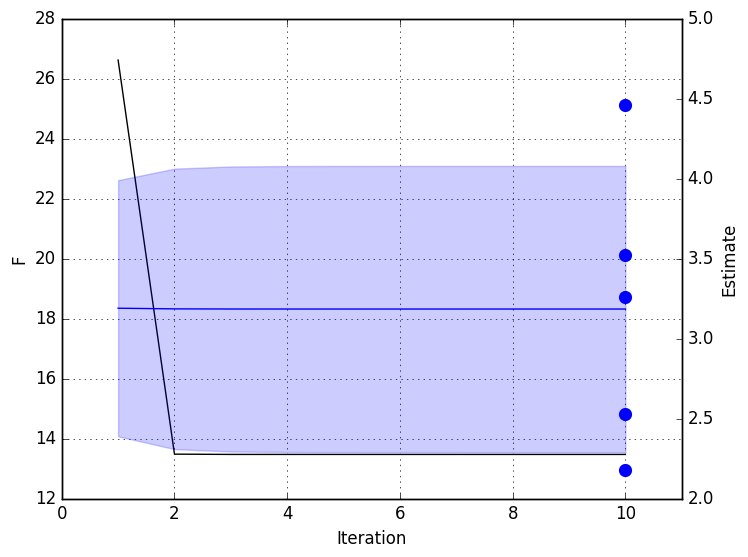

In [9]:
using PyPlot

# Plot free energy to check for convergence
plot(1:n_its, F, color="black")
grid("on")
xlabel("Iteration")
ylabel("F")

# Plot estimated distribution
PyPlot.plt[:twinx]()
plot(1:n_its, m_est, color="blue")
fill_between(1:n_its, m_est-sqrt.(1.0./w_est), m_est+sqrt.(1.0./w_est), color="blue", alpha=0.2)
ylabel("Estimate")

# Plot samples
scatter(n_its*ones(n), y_data, color="blue", linewidth=5)

xlim(0.0, n_its+1)
;

In [10]:
# Inspect the results
println("\n----- Estimates after $(n_its) VMP updates -----")
println("Mean estimate: $(round(mean(marginals[:m]),2)), with variance $(round(var(marginals[:m]),2))")
println("Precision estimate: $(round(mean(marginals[:w]),2)), with variance $(round(var(marginals[:w]),2))")


----- Estimates after 10 VMP updates -----
Mean estimate: 3.18, with variance 0.16
Precision estimate: 1.25, with variance 0.62
